# One Variable Equations. Part II
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/material/one-variable-equations-fixed-point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- - -
- [Bisection Method](./one-variable-equations.ipynb#Bisection-Method) 
    - [Steps](./one-variable-equations.ipynb#Steps-BM)
    - [Stop condition](./one-variable-equations#Stop-condition-BM)
    - [Error analysis](./one-variable-equations#Error-analysis-BM)
    - [Example 1](./one-variable-equations#Example-1)
    - [Example 2](./one-variable-equations#Example-2)
- [Fixed-point Iteration](#Fixed-point-Iteration)
    - [Steps](#Steps-FP)
    - [Example 3](#Example-3)
    - [Stop condition](#Stop-condition-FP)
    - [Example 4](#Example-4)
    - [Activity](#ACTIVITY-FP)
- [Newton-Raphson Method](#Newton-Raphson-Method)
    - [Derivation](#Derivation-NM)
    - [Steps](#Steps-NM)
    - [Example 5](#Example-5)
    - [Stop condition](#Stop-condition-NM)
    - [Convergence](#Convergence-NM)
- [Secant Method](#Secant-Method)
    - [Derivation](#Derivation-SM)
    - [Steps](#Steps-SM)

## Bibliography
[1] [Kiusalaas, Numerical Methods in Engineering with Python](https://drive.google.com/file/d/0BxoOXsn2EUNIQUdFVkctR2xWRUk/view?usp=sharing)<br/>
[2] [Jensen, Computational_Physics](https://drive.google.com/file/d/0BxoOXsn2EUNIekRUMFVPYXVsSTg/view?usp=sharing).  Companion repos: https://github.com/mhjensen [Web page](http://compphysics.github.io/ComputationalPhysics/doc/web/course)  <br/>
[3] E. Ayres, [Computational Physics With Python](http://bit.ly/CPwPython)<br/>


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [ ]:
import numpy as np
from scipy import integrate
from scipy import optimize

# Fixed-point Iteration

Although in many cases the use of Bisection is more than enough, there are some pathological situations where the use of more advanced methods is required.
One of the advantages featured by this method is one does not have to give an interval where the solution is within, instead, from a seed the algorithm will converge towards the required solution.

## Steps FP

1. Take your function $f(x)$ and rewrite it like 
$$g(x) = x - f(x)\,.$$

In this way, find the root of $f(x_0)$ is equivalent to find the value when 
$$g(x_0)=x_0\,.$$
This $x_0$ is called the fixed-point of $g(x)$. Note that $g(x)|_{f=0}=x$ is just and straight line of slope one and zero intercept. Therefore, the fixed points corresponds to the points where $g(x)$ crosses that straight line.
1. Give a guest to the solution (root of $f(x)$). This value would be the seed $p_0$, and correspond to the point: $(p_0,g(p_0))$
![IMG](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/fp.svg?sanitize=true)
2. Check the distance to the straight line by goint to the point: $(p_0,g(p_0))$
![IMG](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/fp1.svg?sanitize=true)
3. The next guest to the solution will be given by $p_1 = g(p_0)$ →  $(g(p_0),g(p_0))$
![IMG](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/fp2.svg?sanitize=true)   
4. If the stop condition is not satisfied, then repeat step 2 but with $p_1$.
5. The End!

__Example__: Find the roots of the next functions:

$$f(x) = \frac{x^2-1}{3}\,.$$

We define

__Step 1:__

In [ ]:
def f(x):
    return (x**2-1)/3.0

g = lambda x: x-f(x)

__Step 2:__

In [ ]:
p0 = 0.1
(px,py)=(p0,g(p0))
(px,py)

(0.1, 0.43000000000000005)

![](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/fp1.png)

__Step 3:__

In [ ]:
(px,py)=(g(p0), g(p0) )
(px,py)

(0.43000000000000005, 0.43000000000000005)

__Step 4__: Suggest a solution:

In [ ]:
p1=g(p0)
(px,py)=(p1, g(p1) )
(px,py)

(0.43000000000000005, 0.7017)

![](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/fp3.png)

Implementation of algorithm

In [ ]:
#Defining Fixed-point iteration function
def FixedPoint_Animation( f, pini, Nmax, xmin, xmax ):
    g = lambda x: x-f(x)
    #Initial condition
    pi = [pini,]
    px = [pini,pini,]
    py = [0,]
    #Iterations
    for n in range(Nmax+3):
        pi.append( g(pi[n]) )
        px.append( g(pi[n]) )
        px.append( g(pi[n]) )
        py.append( g(pi[n]) )
        py.append( g(pi[n]) )
    
    py.append( g(pi[n+1]) )
    pi = np.array( pi )
    px = np.array( px )
    py = np.array( py )
    
    print ("Result:", pi[-1])
    
    #Array X-axis
    X = np.linspace(xmin,xmax,100)
    
    #Initializing Figure
    fig = plt.figure( figsize=(7,7) )
    ax = fig.add_subplot(111)
    #Graphic iterations
    fixedpoint, = ax.plot( [], [], color="red", linewidth = 3 )
    #Function g
    ax.plot( X, g(X), color="green", linewidth = 2 )
    #Identity funcion
    ax.plot( X, X, color="blue", linewidth = 2 )
    ax.grid(True)
    ax.set_xlim( (xmin, xmax) )
    ax.set_ylim( (xmin, xmax) )
    ax.set_xlabel( "X axis" )
    ax.set_ylabel( "Y axis" )
    ax.set_title( "Fixed-Point iteration" )
        
    def init():
        fixedpoint.set_data([], [])
        return fixedpoint,
    
    def animate(i):
        #Setting new data
        fixedpoint.set_data( px[:2*i], py[:2*i] )
        ax.set_title( "Fixed-Point. Iteration %d"%i )
        return fixedpoint,
    
    return animation.FuncAnimation(fig, animate, init_func=init,frames=Nmax, interval=500, blit=True)

Find the roots of the next functions:

$$f_1(x) = \frac{x^2-1}{3}$$

using Fixed-Point iteration.

Result: 0.9999999890733635


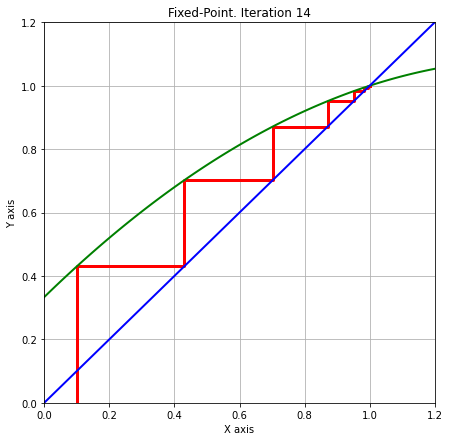

In [ ]:
def f1(x):
    return (x**2-1)/3.0

FixedPoint_Animation( f1, pini = 0.1, Nmax = 15, xmin = 0, xmax = 1.2 )

__Ejemplo 3__:
$$f_2(x) = x-\cos x$$

Result: 0.7387663516682054


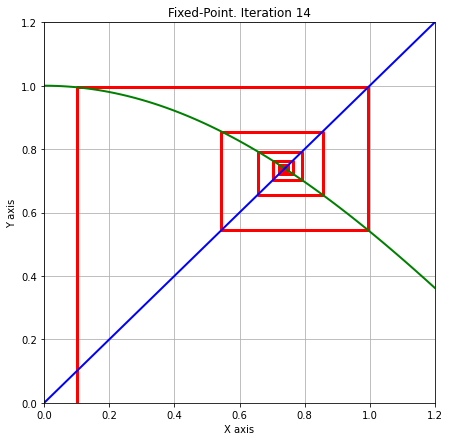

In [ ]:
def f2(x):
    return x-np.cos(x)

FixedPoint_Animation( f2, pini = 0.1, Nmax = 15, xmin = 0, xmax = 1.2 )

In [ ]:
def g(x):
    return x-f1(x)

In [ ]:
from scipy import optimize

In [ ]:
help(optimize.fixed_point)

Help on function fixed_point in module scipy.optimize.minpack:

fixed_point(func, x0, args=(), xtol=1e-08, maxiter=500, method='del2')
    Find a fixed point of the function.
    
    Given a function of one or more variables and a starting point, find a
    fixed-point of the function: i.e. where ``func(x0) == x0``.
    
    Parameters
    ----------
    func : function
        Function to evaluate.
    x0 : array_like
        Fixed point of function.
    args : tuple, optional
        Extra arguments to `func`.
    xtol : float, optional
        Convergence tolerance, defaults to 1e-08.
    maxiter : int, optional
        Maximum number of iterations, defaults to 500.
    method : {"del2", "iteration"}, optional
        Method of finding the fixed-point, defaults to "del2"
        which uses Steffensen's Method with Aitken's ``Del^2``
        convergence acceleration [1]_. The "iteration" method simply iterates
        the function until convergence is detected, without attempting to

In [ ]:
def f1(x):
    return (x**2-1)/3.0

In [ ]:
optimize.fixed_point(lambda x: x-f1(x),0.1)

array(1.)

g(x)=x-f(x)=x_0
g(x_0)=x_0-f(x_0)=x_0

In [ ]:
f1(1)

0.0

In [ ]:
g(1),1-f1(1)

(1.0, 1.0)

## Stop conditions FP

The stop conditions are the same than Bisection:

* A fixed distance between the last two steps (absolute convergence):

    $$|p_i - p_{i-1}|<\epsilon$$

* A fixed relative distance between the last two steps (relative convergence):

    $$\frac{|p_i - p_{i-1}|}{|p_i|}<\epsilon\ \ \ \ \ p_i \neq 0$$

* Function tolerance:

    $$f(p_i)< \epsilon$$

* Computational stop:

    If $N>N_{max}$, stop!

In [ ]:
import random

In [ ]:
random.randint(1,4)

1

__Activity__: Use the `optimize.fixed_point` to find the root of `f2(x)`

In [ ]:
optimize.fixed_point(lambda x : x - f2(x), 1)

array(0.73908513)

## Example 4

There is a type of functions whose roots coincides with a local or global minima or maxima. This condition implies the function does not cross the x-axis at the root and the problem cannot be solved by using Bisection as the criterion of different signs cannot be satisfied. Fixed-point iteration is a more feasible alternative when solving these problems.

As an example, here we shall solve the roots of the function

$f(x) = x^2\cos(2x)$

For this, we plot the function first:

It is clear there are three root within the plotted interval, i.e. $x_0 = -\pi/4$, $x_1 = 0$ and $x_2 = \pi/4$. Using bisection for the first and third roots we obtain:

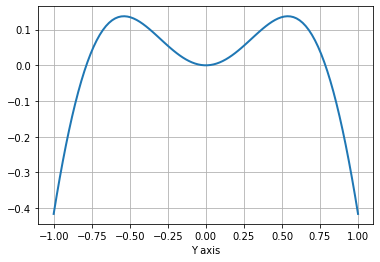

In [ ]:
def f(x):
    return x**2*np.cos(2*x)

X = np.linspace(-1,1,100)
plt.plot( X, f(X), lw=2 )
plt.xlabel("X axis")
plt.xlabel("Y axis")
plt.grid(True)

In [ ]:
print( "Root x_1", optimize.bisect( f, a=-1, b=-0.5) )
print( "Root x_2", optimize.bisect( f, a=0.5, b=1) )

Root x_1 -0.7853981633979856
Root x_2 0.7853981633979856


However, when applying bisection to the middle root, we obtain:

In [ ]:
print( "Root x_0", optimize.bisect( f, a=-0.5, b=0.5) )

ValueError: ignored

Now, applying Fixed-point iteration:

Result: 0.017317568681637058


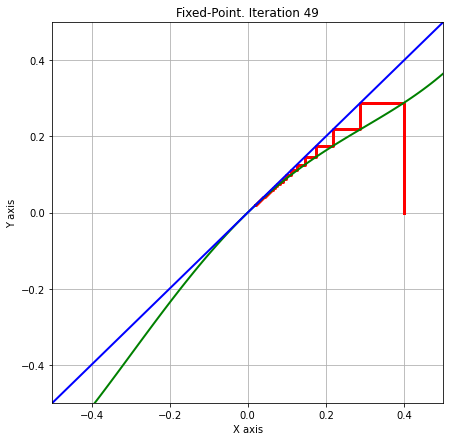

In [ ]:
FixedPoint_Animation( f, pini = 0.4, Nmax = 50, xmin = -0.5, xmax = 0.5 )

__Activity__: Comprobar con scipy y fixed_point

In [ ]:
optimize.fixed_point(lambda x : x - f(x), x0=0.4)

array(4.04146353e-09)

Notice, however, that this is still considerably far away from some value that can be regarded as a "numerical 0." We may, for instance, try to increase the tolerance of the `fixed point` routine, as well as its number of maximum iterations. 

Nevertheless, and as a remarkable example, the algorithm can only possibly yield an order of magnitude less, up to a total number of iterations as high as 500000(!). Such a computation is evidently inefficient, for we are not actually getting much closer to the zero value, while we do increase the number of operations that need to be carried out. 

In [ ]:
optimize.fixed_point(lambda x : x - f(x), x0=0.4, xtol=1e-9, maxiter=500000)

array(4.9981609e-10)

## ACTIVITY FP

When a new planet is discovered, there are different methods to estimate its physical properties. Many times is only possible to estimate either the planet mass or the planet radius and the other property has to be predicted through computer modelling.

If one has the planet mass, a very rough way to estimate its radius is to assume certain composition (mean density) and a homogeneous distribution (a very bad assumption!). For example, for the planet [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) with a mass $M= 5.40 M_{\oplus}$, if we assume an earth-like composition, i.e. $\bar \rho_{\oplus} = 5520\ kg/m^3$, we obtain:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{\oplus} } \right)^{1/3} \approx 1.75 R_{\oplus}$$

That would be the planet radius if the composition where exactly equal to earth's.

A more realistic approach is assuming an internal one-layer density profile like:

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

where $\rho_0$ is the density at planet centre and $L$ is a characteristic lenght depending on the composition. From numerical models of planet interiors, the estimated parameters for a planet of are $M= 5.40 M_{\oplus}$ are approximately $\rho_0 = 18000\ kg/m^3$ and $L = 6500\ km$.

Integrating over the planet volume, we obtain the total mass as

$$M = 4\pi \int_0^R \rho(r)r^2dr$$

This is a function of the mass in terms of the planet radius. 

Solving the equation $M(R) = M_{g832c}$ it would be possible to find a more realistic planet radius. However when using numerical models, it is not possible to approach the solution from the left side as a negative mass makes no sense.

<font color='red'>    
In an IPython notebook, solve the previous problem and find the radius of **Gliese 832c** using your own version of the Fixed-point iteration algorithm.
</font>

- - -

# Newton-Raphson Method

Although Fixed-point iteration is an efficient algorithm as compared with Bisection, the Newton-Raphson method is an acceletared convergent scheme where the roots of a function are easily found with just a few iterations.

## Derivation NM

Although this method can be presented from an algorithmic point of view, the mathematical deduction is very useful as it allows us to understand the essence of the approximation as well as estimating easily the convergence errors.

Let be $f(x)$ a continuous and differentiable function defined within an interval $[a,b]$ (i.e. $f\in \mathcal{C}^2[a,b]$), and $p$ is a root of the function such that $f(p) = 0$. If we give an initial an enough close guess $p_0$ to this root, such that $|p-p_0|<\epsilon$, where $\epsilon$ is adequately small, we can expand the function by using a second order taylor serie, yielding:

$$f(p) = f(p_0) + (p-p_0)f'(p_0) + \frac{(p-p_0)^2}{2}f''(p_0) + \mathcal{O}^3(|p-p_0|)$$

but as $f(p) = 0$ and $|p-p_0|^2<\epsilon^2$ is an even smaller quantity, we can readily neglect from second order terms, obtaining

$$p \approx p_0 - \frac{f(p_0)}{f'(p_0)} \equiv p_1$$

If we repeat this process but now using $p_1$ as our guess to the root instead of $p_0$ we shall obtain:

$$p \approx p_1 - \frac{f(p_1)}{f'(p_1)} \equiv p_2$$

and so...

$$p \approx p_n - \frac{f(p_n)}{f'(p_n)} \equiv p_{n+1}$$

where each new iteration is a better approximation to the real root.

## Steps NM

1. Take your function $f(x)$ and derive it, $f'(x)$.
2. Give a guest to the solution (root of $f(x)$). This value would be the seed $p_0$.
3. The next guest to the solution will be given by

    $$p_{n+1} = p_n - \frac{f(p_n)}{f'(p_{n+1})}$$

4. If the stop condition is not satisfied, then repeat step 3.
5. The End!

In [ ]:
#Defining Newton Method
def NewtonRaphson_Animation( f, fp, pini, Nmax, xmin, xmax ):
    #Initial condition
    p = [pini,]
    p_dash = []
    p_der = []
    #Iterations
    for n in range(Nmax):
        p.append( p[n] - f(p[n])/fp(p[n]) )
        p_dash.append( p[n] )
        p_dash.append( p[n] )
        p_der.append( 0 )
        p_der.append( f(p[n]) )
    
    p = np.array( p )
    p_dash = np.array( p_dash )
    p_der = np.array( p_der )
    
    print (  "Result:", p[-1])    
    #Array X-axis
    X = np.linspace(xmin,xmax,100)
    
    #Initializing Figure
    fig = plt.figure( figsize=(7,7) )
    ax = fig.add_subplot(111)
    #Graphic iterations
    dash, = ax.plot( [], [], "--", color="gray", linewidth = 2 )
    derivative, = ax.plot( [], [], color="red", linewidth = 3 )
    #Function f
    ax.plot( X, f(X), color="green", linewidth = 2 )
    #Horizontal line
    ax.hlines( 0, xmin,xmax, color="black", lw = 2 )
    ax.grid(True)
    ax.set_xlim( (xmin, xmax) )
    ax.set_xlabel( "X axis" )
    ax.set_ylabel( "Y axis" )
    ax.set_title( "Fixed-Point iteration" )
        
    def init():
        dash.set_data([], [])
        derivative.set_data([], [])
        return dash, derivative
    
    def animate(i):
        #Setting new data
        dash.set_data( p_dash[:2*i+2], p_der[:2*i+2] )
        derivative.set_data( p_dash[2*i+1:2*i+3], p_der[2*i+1:2*i+3] )
        ax.set_title( "Newthon-Raphson Method. Iteration %d"%i )
        return dash, derivative
    
    return animation.FuncAnimation(fig, animate, init_func=init,frames=Nmax, interval=500, blit=True)

## Example 5

Find one root of the function:

$f(x) = x^2 - x$

with derivative

$f'(x) = 2x -1$

using the Newton-Raphson method.

Result: 1.0


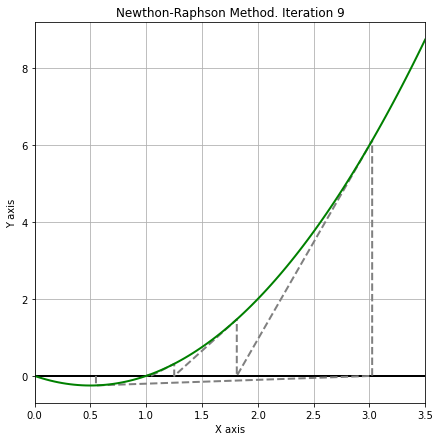

In [ ]:
#Defining the function
def f(x): 
    return x**2-x
#Defining the derivative
def df(x): 
    return 2*x-1
#Calculating root
NewtonRaphson_Animation( f, df, pini = 0.55, Nmax = 10, xmin = 0, xmax = 3.5 )

## Stop conditions NM

The stop conditions are the same than Bisection and Fixed-point iteration:

* A fixed distance between the last two steps (absolute convergence):

    $$|p_i - p_{i-1}|<\epsilon$$

* A fixed relative distance between the last two steps (relative convergence):

    $$\frac{|p_i - p_{i-1}|}{|p_i|}<\epsilon\ \ \ \ \ p_i \neq 0$$

* Function tolerance:

    $$f(p_i)< \epsilon$$

* Computational stop:

    If $N>N_{max}$, stop!

## Convergence NM

It is possible to demonstrate by means of the previous derivation procedure, that the convergence of the Newton-Raphson method is quadratic, i.e., if $p$ is the exact root and $p_n$ is the $n$-th iteration, then

$$|p_{n+1}-p|\leq C |p_n-p|^2$$

for a fixed ans positive constant $C$.

This implies, if the initial guess is good enough such that |p_0-p| is small, the convergence is achieved very fast as each iteration improves the precision twice in the order of magnitude, e.g., if $|p_0-p|\sim 10^{-1}$, $|p_1-p|\sim 10^{-2}$, $|p_2-p|\sim 10^{-4}$, $|p_2-p|\sim 10^{-8}$ and so.

In [ ]:
#Defining Newton Method
def NewtonRaphson( f, fp, pini, Nmax ):
    #Initial condition
    p = pini
    #Iterations
    for n in  range(Nmax):
        p = p - f(p)/fp(p)
    #Final result
    return p


**ACTIVITY**
    
In an IPython notebook, copy the latter routine NewtonRaphson and the Bisection routine provided in this notebook (*and if you have it already, the Fixed-point iteration routine as well*) and find the root of the next function using all the methods.
    
$f(x) = x - \cos(x)$
    
Plot in the same figure the convergence of each method as a function of the number of iterations.


See the __Summary__ section at the end for the implementation in Scipy

- - -

# Secant Method

The Newton-Raphson method is highly efficient as the convergence is accelerated, however there is a weakness with it: one needs to know the derivative of the function beforehand. This aspect may be complicated when dealing with numerical functions or even very complicated analytical functions. Numerical methods to derive the input function can be applied, but this extra procedure may involve an extra computing time that compensates the time spent by using other methods like Bisection.

## Derivation SM

Retaking the iterative expression obtained from the Newton-Raphson method:

$$p_{n+1} = p_n - \frac{f(p_n)}{f'(p_{n+1})}$$

the derivative can be approximated as

$$f'(p_n) = \lim_{x\rightarrow p_n} \frac{f(x)-f(p_n)}{x-p_n} $$

As we know, the convergence of the NR method is quadratic, so $p_{n-1}$ should be close enough to $p_n$ such that one can assume $p_{n-1}\rightarrow p_n$ and the previous term is:

$$f'(p_n) \approx \frac{f(p_{n})-f(p_{n-1})}{p_{n}-p_{n-1}} $$

The final expression for the $n$-th iteration of the root is then:

$$p_n = p_{n-1} - \frac{ f(p_{n-1})(p_{n-1}-p_{n-2}) }{f(p_{n-1})-f(p_{n-2})}$$

In this consists the Secant method, what is just an approximation to the Newton-Raphson method, but without the derivative term.

## Steps SM

1. Give the input function $f(x)$.
2. Give two guests to the solution (root of $f(x)$). These values would be the seeds $p_0$, $p_1$.
3. The next guest to the solution will be given by

    $$p_n = p_{n-1} - \frac{ f(p_{n-1})(p_{n-1}-p_{n-2}) }{f(p_{n-1})-f(p_{n-2})}$$

4. If the stop condition is not satisfied, then repeat step 3.
5. The End!

See the __Summary__ section at the end for the implementation in Scipy

**ACTIVITY**
    
In an IPython notebook and based on the routine NewtonRaphson, write your own routine SecantMethod that performs the previous steps for the Secant Method. Test your code with the function $f(x)$:
    
$f(x) = x - \cos(x)$
</font>

**ACTIVITY**


It is known that light rays are deflected when they pass near by a gravitational field and that this deviation is proportional to the body mass which the light is interacting with and inversely proportional to the passing distance. 
Since it is common finding very massive structures in the universe and the measures that are done to study it involve photons, it makes sense to study what happens to a light source image when the rays get close to a grumpy object like a dark matter halo.  


In order to study the light deflection in these cases, it will be used the simplest model, gravitational lens theory, where the len is a very massive object. A sketch of a typical system is shown in the figure below. The source plane is the light source or image that is going to be affected,  $\eta$ is the distance from a image point to the line of sight and $\beta$ the subtended angle by the point. 
The lens plane corresponds to the mass that affects the light coming from the source, $\xi$ is the new image point distance to the line of sight, $\theta$ is the subtended angle by the new point position. Then, $\alpha$ is the deflection angle. 

Since from observations $\theta$ is known, the problem to be solved per pixel usually is 

\begin{equation}
\beta = \theta - \hat{\alpha}(\theta) 
\end{equation}

but $\alpha$ also depends on $\theta$ besides the len halo properties. This would allow construct the real image
from the distorted and magnified one. 

<img src="https://github.com/restrepo/ComputationalMethods/blob/master/material/figures/lente1.png?raw=1">

This equation can also be written in terms of distances 

\begin{equation}
\vec{\eta}  = \frac{D_s}{D_d} \vec{\xi} - D_{ds}\alpha ( \vec{\xi }) 
\end{equation}

The solution to the lens equation is easier to get if it is assumed that the len is axially symmetric. In this case, the deflection angle  takes the next form

$$ \hat{\alpha}(\vec{\xi}) = \frac{\vec{\xi}}{|\vec{\xi}|^2} \frac{8G\pi}{c^2} \int_0^\xi d\xi'\xi'\Sigma(\xi')$$

The quantity $\Sigma$ is the surface mass density, i.e., the len's mass enclosed inside $\xi$ circle per area unit.  
It is important to notice that the direction of $\alpha$ is the same as $\xi$ and consequently $\eta$. 


The problem to be solved is the next: Given the positions of a square find the image distorsion due to gravitational lensing, i.e., find the root of \xi in the trascendal equation it satisfies. Use the routines given below and all of 
the data for the len and image that is going to be distorted. 


In [ ]:
#Superficial density of the lens
def Sup_density(radio):
    return radio*M*len(r[r<radio])/radio**2.

#Deviation angle due to the gravitational len
def des_angle( radio ):
    return 2*np.pi*4*G*integrate.quad( Sup_density ,0, radio )[0]/(radio*c**2)

#Len equation
def Len_equation(radio, eta):
    return eta - Ds*radio/Dd - Dds*des_angle( radio )


In [ ]:
# Len distribution generated 
M = 3e7
L = 1e5
puntos = 6
Ds = 1000
Dd = 900
Dds = Ds - Dd
G = 4.302e-3# pc M_sun**-1(km/s)**2
c = 3e6 # km/s 
x = np.linspace(0,L,puntos)
y = np.linspace(0,L,puntos)
X,Y = np.meshgrid(x,y)
#Generating meshgrid of points 
X = np.reshape(X,puntos*puntos)
Y = np.reshape(Y,puntos*puntos)
r = np.sqrt(X**2 + Y**2)

#Image to be distorted
Li = 5
ni = 8
X0 = np.linspace(-Li,Li,ni)
Y0 = np.linspace(-Li,Li,ni)
#Generating meshgrid of points 
X0,Y0 = np.meshgrid(X0,Y0)
r0 = np.sqrt( X0**2 + Y0**2 )
theta = np.zeros((ni,ni))
epsilon = np.zeros((ni,ni))

In [ ]:
xc = epsilon*np.cos(theta)
yc = epsilon*np.sin(theta)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(xc,yc,'b.');
plt.subplot(1,2,2)
plt.plot(X0,Y0,"b.");

## Summary

* optimize.bisect
* optimize.fixed_point
* optimize.newton

In `scipy.optimize` the `newton` method contains both the `secant` and `Newton-Raphson` algorithms. The las one is used when the derivative of the function is used explicitly

In [ ]:
optimize.newton?

In [ ]:
import numpy as np
from scipy import optimize 
def f(x):
    return x**2*np.cos(2*x)

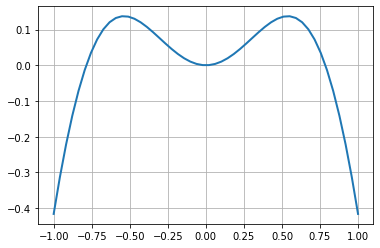

In [ ]:
x=np.linspace(-1,1)
plt.plot( x, f(x), lw=2 )
plt.grid()

In [ ]:
def g(x):
    return x-f(x)

In [ ]:
def fprime(x):
    "Derivate of f=x**2*np.cos(2x)"
    return 2*x*np.cos(2*x) - 2*x**2*np.sin(2*x)

In [ ]:
root1=optimize.fixed_point(g,-1.0)
root2=optimize.fixed_point(g,0.5)
root3=optimize.fixed_point(g,0.75)

print("las raices son x={} x={} x={}".format(root1,root2,root3))

las raices son x=-0.7853981633974483 x=-4.363697583627993e-09 x=0.7853981633974483


In [ ]:
f(root1),f(root2),f(root3)

(3.777118574576472e-17, 1.9041856601360782e-17, 3.777118574576472e-17)

In [ ]:
#Secant
root1=optimize.newton(f,-1)
root2=optimize.newton(f,0.4,tol=1E-16,maxiter=100)
root3=optimize.newton(f,0.5)

print("las raices son x={} x={} x={}".format(root1,root2,root3))

las raices son x=-0.7853981633974487 x=1.0433087260535526e-16 x=-0.7853981633974482


In [ ]:
# Newton Raphson
root1=optimize.newton(f,-1,fprime)
root2=optimize.newton(f,0.1,fprime,tol=1E-16)
root3=optimize.newton(f,0.5,fprime)

print("las raices son x={} x={} x={}".format(root1,root2,root3))

las raices son x=-0.7853981633974483 x=8.642260125895126e-17 x=-0.7853981633974484


In [ ]:
root2=optimize.newton(f,0,fprime)
root2

0.0

## Brent's method.
Find a root of a function in a bracketing interval using Brent's method.

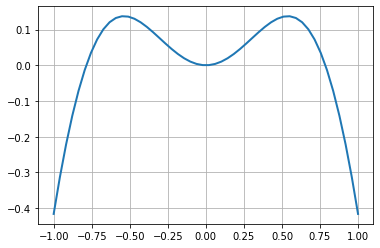

In [ ]:
x=np.linspace(-1,1)
plt.plot( x, f(x), lw=2 )
plt.grid()

In [ ]:
from scipy.optimize import brentq

In [ ]:
brentq(f,-1,-0.5)

-0.7853981633973381

In [ ]:
brentq(f,-0.5,0.5)

ValueError: f(a) and f(b) must have different signs